<a href="https://colab.research.google.com/github/jaassoon/lihang_book_algorithm/blob/master/mlp/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

有时候，看看神经网络学习到的权重可以帮助我们深入了解神经网络的学习行为。例如，如果权重看起来是非结构化的，可能有些特征根本没有用到。如果存在非常大的系数，可能正则化项设置的较低，或者学习率太高了。

这个例子告诉我们如何将MLP（Multi-Layer Perceptron，多层感知器）分类器在MNIST数据集上训练得到的第一层的权重可视化。

输入数据是28×28像素的手写数字，因此有784（28×28=784）个特征。所以第一层的权重矩阵的维度是(784，hidden_layer_sizes[0])，我们可以拿出权重矩阵的单独一列可视化成一个28×28的图片。

为了运行更快，这里只用了很少的隐藏层单元，并且只训练了很短的时间。训练时间更长的话，权重会更平滑。

In [0]:
#参考自https://zhuanlan.zhihu.com/p/51250297 MLP权重在MNIST数据集上的可视化
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

In [5]:
#%debug
print(__doc__)
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print('Length of X is {}, 表示取得7万张图片'.format(len(X)))
print('X is {}， onehot格式的图片数据'.format(X))
print('y is {}，显示前20个标签的值'.format(y[:20]))
X = X / 255.

#然后划分训练集和测试集，这里就简单地将前6万个样本作为训练集，剩下的作为测试集：
# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

Automatically created module for IPython interactive environment
Length of X is 70000, 表示取得7万张图片
X is [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]， onehot格式的图片数据
y is ['5' '0' '4' '1' '9' '2' '1' '3' '1' '4' '3' '5' '3' '6' '1' '7' '2' '8'
 '6' '9']，显示前20个标签的值


In [6]:
#然后就是调用MLPClassifier，得到一个分类器：
# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
#hidden_layer_sizes是隐藏层的维度，这里只设置了一个隐藏层，为50个神经元。
#最大迭代次数只设置了10次，alpha是正则项前面的参数。这里选择用SGD训练，verbose是设置是否输出训练时的信息。

#定义好分类器后，就是训练了：
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05529723
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.986800
Test set score: 0.970000


第一句是创建一个figure和多个子图，这里将画图界面分成4×4的格式，也就是16个图，因此axes是包含了4×4个元素的array，代表着16个子图。

这里只取了第一层的权重矩阵（实际上这里也只有一层），维度是（784,50）。因为权重有大有小，画在一张图上可能差异比较大，所以第二句代码先取了这列的最小值vmin和最大值vmax，便于后面控制标准化。

for循环中的axes.ravel()是将多维数据降为一维，并且默认是行序优先。降维之后维度是（16，）。注意这里权重矩阵转置之后维度是（50,784），两者的行不一致，但仍然可以zip。

matshow是将矩阵以图片的形式展现出来的函数。cmap=plt.cm.gray是灰度显示。vmin和vmax参数是用来控制标准化时候的最小和最大值。set_xticks和set_yticks是设置x轴和y轴的数字标签，这里设置为空表明最终的图片没有x轴和y轴标签。

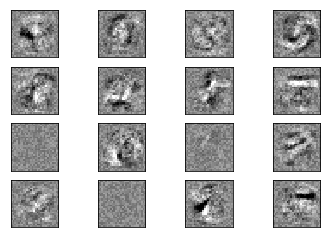

转置后的权重矩阵 [[-0.01405516 -0.08141165 -0.02936362 ...  0.02848052 -0.05605756
   0.04899327]
 [ 0.03731949  0.03029191  0.00458322 ... -0.07641292  0.08426531
   0.04567228]
 [-0.08467273 -0.04884564  0.0653725  ... -0.01940089 -0.07566693
  -0.01877677]
 ...
 [-0.0349585   0.01248014  0.03607697 ... -0.06692097 -0.03975366
   0.04117367]
 [-0.03594751 -0.08420591  0.01011511 ... -0.0281908  -0.06697031
  -0.00405521]
 [-0.06266732  0.0198425  -0.08256532 ... -0.05097943  0.08218818
  -0.05411453]]
转置前的权重矩阵 [[-0.01405516  0.03731949 -0.08467273 ... -0.0349585  -0.03594751
  -0.06266732]
 [-0.08141165  0.03029191 -0.04884564 ...  0.01248014 -0.08420591
   0.0198425 ]
 [-0.02936362  0.00458322  0.0653725  ...  0.03607697  0.01011511
  -0.08256532]
 ...
 [ 0.02848052 -0.07641292 -0.01940089 ... -0.06692097 -0.0281908
  -0.05097943]
 [-0.05605756  0.08426531 -0.07566693 ... -0.03975366 -0.06697031
   0.08218818]
 [ 0.04899327  0.04567228 -0.01877677 ...  0.04117367 -0.00405521
  -0.05411453]]

In [7]:
#%debug
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()
print('转置后的权重矩阵 {}'.format(mlp.coefs_[0].T))
print('转置前的权重矩阵 {}'.format(mlp.coefs_[0]))